
# Impact of Initial Spread Rate on Final Wildfire Outcomes

### Reaserch Topic
This study investigates the impact of initial spread rate on the final outcomes of wildfires, focusing on total burned area, duration, and damage potential. Using the Initial Spread Index (ISI) as a primary metric, alongside additional variables such as wind speed, temperature, Buildup Index (BUI), and precipitation, this research aims to understand **how early fire dynamics influence the overall intensity and persistence of wildfires**.


## Data PrePrcoess
1. Merge all netCDF data from 2011-2020
2. Extract data in Alberta by Latitude and Longtitue range.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import dask.array as da
from nc_operation import nc_operation

In [2]:
INDEX_TYPE = 'ISI'
nco = nc_operation(file_path_pattern=f'ISI_dataset/initial_spread_index_*.nc', index_type=INDEX_TYPE, start_year=2011, end_year=2020)

/Users/paullin/Desktop/DATA604-Project/env/lib/python3.10/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 53941 instead
  warnings.warn(


Processing file: ISI_dataset/initial_spread_index_2011.nc
Processing file: ISI_dataset/initial_spread_index_2012.nc
Processing file: ISI_dataset/initial_spread_index_2013.nc
Processing file: ISI_dataset/initial_spread_index_2015.nc
Processing file: ISI_dataset/initial_spread_index_2016.nc
Processing file: ISI_dataset/initial_spread_index_2017.nc
Processing file: ISI_dataset/initial_spread_index_2018.nc
Processing file: ISI_dataset/initial_spread_index_2019.nc
Processing file: ISI_dataset/initial_spread_index_2020.nc


In [3]:
alberta_data = nco.data
print(alberta_data.coords)

Coordinates:
  * Latitude   (Latitude) float64 360B 60.0 59.75 59.5 59.25 ... 49.5 49.25 49.0
  * Time       (Time) datetime64[ns] 26kB 2011-01-01 2011-01-02 ... 2020-12-31
  * Longitude  (Longitude) float64 328B -115.0 -114.8 -114.5 ... -105.2 -105.0


In [ ]:
monthly_isi = alberta_data['ISI'].resample(Time='1ME').mean()

In [12]:

test_data = alberta_data.sel(Time='2018-07-01', method="nearest")

In [17]:
nco.convert_to_shapefile(monthly_isi, "output_shapefile.shp")

NameError: name 'monthly_isi' is not defined

/Users/paullin/Desktop/DATA604-Project/env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:527: UserWarning: Glyph 21472 (\N{CJK UNIFIED IDEOGRAPH-53E0}) missing from font(s) DejaVu Sans.
  super()._update_title_position(renderer)
/Users/paullin/Desktop/DATA604-Project/env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:527: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from font(s) DejaVu Sans.
  super()._update_title_position(renderer)
/Users/paullin/Desktop/DATA604-Project/env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:527: UserWarning: Glyph 22478 (\N{CJK UNIFIED IDEOGRAPH-57CE}) missing from font(s) DejaVu Sans.
  super()._update_title_position(renderer)
/Users/paullin/Desktop/DATA604-Project/env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:527: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from font(s) DejaVu Sans.
  super()._update_title_position(renderer)
/Users/paullin/Desktop/DATA604-Project/env/lib/python3.10/si

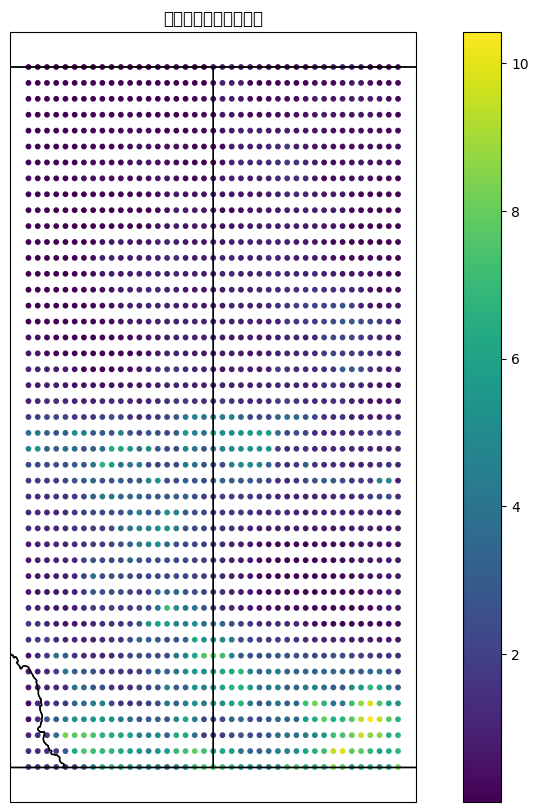

In [19]:
import geopandas as gpd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 加载点图层数据
point_layer = gpd.read_file("output_shapefile.shp")  # 替换为您的 Shapefile 路径

# 创建地图，使用 PlateCarree 投影
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# 添加城市边界（省/州级别的行政边界）
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.STATES, linestyle='-', edgecolor='black')  # 添加州/省级边界

# 绘制点图层
point_layer.plot(
    ax=ax,
    column='ISI',  # 用 'ISI' 列的值来映射颜色
    cmap='viridis',
    legend=True,
    markersize=10
)

# 显示图形
plt.show()

In [ ]:
#nco.show_map_for_date_range(monthly_isi, 2011, 3, 2011, 5)